___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2022
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Tema: Redes Neuronales para Clasificación</font>

- Las redes neuronales para clasificación toman como salida valores discretos, generalmente valores binarios (0, 1)
- Aplicar con éxito en la red neuronal a un problema de clasificación requiere que los valores de la red estén limitados en un rango de 0 y 1.
- Una transformación no lineal es incluída en el modelo de red neuronal. Usualmente esta transformación es una función sigmoidal. 

**Entonces... ¿qué pasaría si tengo una red neuronal con sólo una capa, donde la función de activación es sigmoidal? sería lo mismo que aplicar una regresión logística**

Red neuronal con una capa con función de activación sigmoidal = Regresión logística

**Modelo matemático**

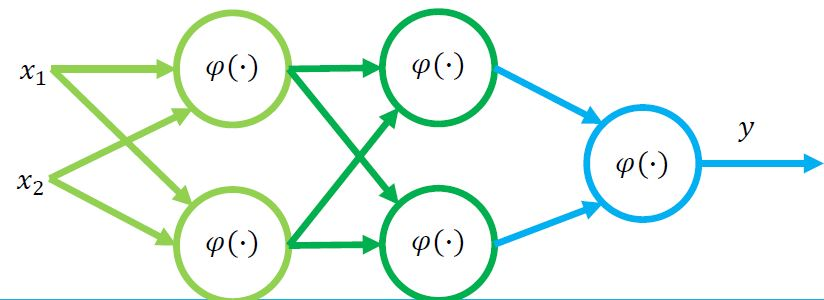

In [1]:
from IPython.display import Image
Image(filename='capa_oculta2.JPG', width=300, height=200)

<font color= #66CC00>$$\nu^{1} = w_{0}^{1}+w^{1}$$</font>
<font color= #66CC00>$$y^{1} = \varphi(\nu^{1})$$</font>
<font color= #009900>$$\nu^{2} = w_{0}^{2}+w^{2}y_{1}$$</font>
<font color= #009900>$$y^{2} = \varphi(\nu^{2})$$</font>
<font color= #3399FF>$$\nu^{3} = w_{0}^{3}+w^{3}y_{2}$$</font>
<font color= #3399FF>$$y^{3} = \varphi(\nu^{3})$$</font>

Para un problema de clasificación multiclase, el número de salidas aumenta en función del número de clases a clasificar

**Ejemplo para salida binaria**

Queremos predecir si una persona va a tener diabetes o no (Outcome)

In [2]:
#Librerías
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv(r'diabetes.csv')

In [4]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Seleccionar datos para train y test
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [6]:
#Escalar datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
#Construir red neuronal
from keras.models import Sequential
from keras.layers import Dense

# Estructura de la red neuronal
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #se puede cambiar la función de activación
model.add(Dense(1, activation='sigmoid')) #La capa de salida debe ser "sigmoidal" para problemas binomiales (0 y 1)

# Configuración del optimizador
model.compile(loss='binary_crossentropy', # funcion de costo 
              optimizer='sgd',
              metrics=['accuracy'])

# Entrenamiento de la red neuronal
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1)

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6244 - accuracy: 0.6648
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 0.6203 - accuracy: 0.6723
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6165 - accuracy: 0.6778
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6128 - accuracy: 0.6797
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.6853
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 0.6054 - accuracy: 0.6853
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 0.6021 - accuracy: 0.6927
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5988 - accuracy: 0.6965
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5955 - accuracy: 0.7076
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 0.5925 - accuracy: 0.7095
Epoch 11/200
6/6 [===========

6/6 [==============================] - 0s 1ms/step - loss: 0.4947 - accuracy: 0.7616
Epoch 85/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4941 - accuracy: 0.7616
Epoch 86/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.7616
Epoch 87/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4930 - accuracy: 0.7616
Epoch 88/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4925 - accuracy: 0.7616
Epoch 89/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4919 - accuracy: 0.7598
Epoch 90/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4914 - accuracy: 0.7598
Epoch 91/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4908 - accuracy: 0.7598
Epoch 92/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4903 - accuracy: 0.7616
Epoch 93/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4898 - accuracy: 0.7616
Epoch 94/200
6/6 [===============

6/6 [==============================] - 0s 1ms/step - loss: 0.4667 - accuracy: 0.7765
Epoch 168/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4665 - accuracy: 0.7765
Epoch 169/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4663 - accuracy: 0.7765
Epoch 170/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4662 - accuracy: 0.7765
Epoch 171/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4660 - accuracy: 0.7765
Epoch 172/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4658 - accuracy: 0.7765
Epoch 173/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4656 - accuracy: 0.7765
Epoch 174/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4654 - accuracy: 0.7765
Epoch 175/200
6/6 [==============================] - 0s 1ms/step - loss: 0.4653 - accuracy: 0.7765
Epoch 176/200
6/6 [==============================] - 0s 2ms/step - loss: 0.4651 - accuracy: 0.7747
Epoch 177/200
6/6 [=====

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

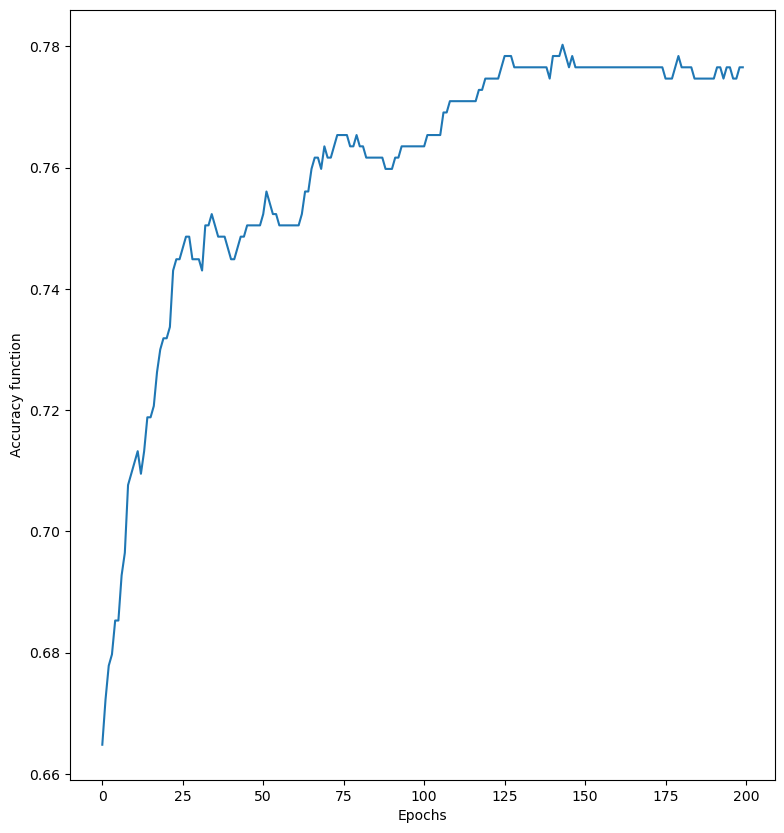

In [8]:
#Ver el performance del modelo en el entrenamiento
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')


In [9]:
#Usar el modelo para predecir
Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")


8/8 [==============================] - 0s 858us/step


In [10]:
Y_pred

array([[0.37883383],
       [0.13361625],
       [0.08495832],
       [0.16656333],
       [0.4957378 ],
       [0.6189468 ],
       [0.04515174],
       [0.6497165 ],
       [0.65349555],
       [0.7150502 ],
       [0.2698944 ],
       [0.78133523],
       [0.49584448],
       [0.35052884],
       [0.09818153],
       [0.4626747 ],
       [0.09548798],
       [0.07402391],
       [0.6066345 ],
       [0.6142529 ],
       [0.23182373],
       [0.10055946],
       [0.5295998 ],
       [0.09726066],
       [0.59959793],
       [0.80881256],
       [0.09260251],
       [0.08111102],
       [0.18983331],
       [0.1573296 ],
       [0.77138597],
       [0.76182646],
       [0.7850293 ],
       [0.6747815 ],
       [0.6066234 ],
       [0.7445448 ],
       [0.7415714 ],
       [0.24411257],
       [0.53147966],
       [0.62695026],
       [0.06525666],
       [0.6974172 ],
       [0.62460905],
       [0.36680737],
       [0.09727561],
       [0.64004636],
       [0.7722928 ],
       [0.147

In [11]:
Y_prob

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

In [12]:
#Evaluar modelo
score = model.evaluate(X_test, Y_test,verbose=1)
print(score)

8/8 [==============================] - 0s 1ms/step - loss: 0.5277 - accuracy: 0.7186
[0.527696430683136, 0.7186146974563599]


In [13]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)
accu_train = accuracy_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
prec_train = precision_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
reca_train = recall_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))


accu_test = accuracy_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
prec_test = precision_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
reca_test = recall_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

8/8 [==============================] - 0s 858us/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.777 	 0.698 	 0.638
  Test 	 0.719 	 0.586 	 0.637


In [14]:
#Comparar contra Regresión logística
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train,Y_train)
Yhat = model_log.predict(X_train)

accu_train = accuracy_score(Y_train,Yhat)
prec_train = precision_score(Y_train,Yhat)
reca_train = recall_score(Y_train,Yhat)

Yhat = model_log.predict(X_test)
accu_test = accuracy_score(Y_test,Yhat)
prec_test = precision_score(Y_test,Yhat)
reca_test = recall_score(Y_test,Yhat)

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

 	 Accu 	 Prec 	 Reca
 Train 	 0.782 	 0.741 	 0.580
  Test 	 0.736 	 0.617 	 0.625


**Ejemplo Multiclase**

- Aunque las salidas de la red neuronal están limitadas a un rango de valores entre 0 y 1, no se garantiza que la suma de estos sea igual a 1
- Transformar las salidas para que puedan ser usadas como probabilidades ayuda mucho a la interpretabilidad de las predicciones
- Transformación Softmax

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [15]:
#Librerías
import pandas as pd
from sklearn import datasets
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
#from keras.optimizers import SGD, Adam
from tensorflow.keras.optimizers import SGD, Adam

In [16]:
#Datos
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y #tres tipos de flores

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
dummy_y = np_utils.to_categorical(Y).astype(int)
dummy_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [20]:
dummy_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [21]:
#Dividimos los datos en test y train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [22]:
#Construcción de la red neuronal

# neural network structure
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax')) # Multiclase

#Gradiente descendente
learning_rate=0.1
epochs = 200
momentum = 0.8
decay_rate = learning_rate/epochs
sgd = tf.keras.optimizers.legacy.SGD(lr=learning_rate, decay=decay_rate, momentum=momentum)

# configuracion del optimizador
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# entrenamiento de la red neuronal
#history = model.fit(X, dummy_y,epochs=200, batch_size=100, verbose=1)


history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))


Epoch 1/200


C:\Users\Ricardo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


2/2 [==============================] - 0s 151ms/step - loss: 3.9774 - accuracy: 0.3000 - val_loss: 1.0175 - val_accuracy: 0.5667
Epoch 2/200
2/2 [==============================] - 0s 27ms/step - loss: 1.0387 - accuracy: 0.5667 - val_loss: 0.9911 - val_accuracy: 0.4667
Epoch 3/200
2/2 [==============================] - 0s 25ms/step - loss: 1.0054 - accuracy: 0.5500 - val_loss: 0.8326 - val_accuracy: 0.4000
Epoch 4/200
2/2 [==============================] - 0s 27ms/step - loss: 0.8418 - accuracy: 0.3417 - val_loss: 0.7731 - val_accuracy: 0.3667
Epoch 5/200
2/2 [==============================] - 0s 26ms/step - loss: 0.7813 - accuracy: 0.3833 - val_loss: 0.7460 - val_accuracy: 0.6667
Epoch 6/200
2/2 [==============================] - 0s 26ms/step - loss: 0.7441 - accuracy: 0.7167 - val_loss: 0.6765 - val_accuracy: 0.8000
Epoch 7/200
2/2 [==============================] - 0s 27ms/step - loss: 0.6799 - accuracy: 0.8417 - val_loss: 0.6332 - val_accuracy: 0.7000
Epoch 8/200
2/2 [==============

2/2 [==============================] - 0s 27ms/step - loss: 0.2342 - accuracy: 0.9583 - val_loss: 0.2222 - val_accuracy: 1.0000
Epoch 60/200
2/2 [==============================] - 0s 27ms/step - loss: 0.2297 - accuracy: 0.9667 - val_loss: 0.2184 - val_accuracy: 0.9667
Epoch 61/200
2/2 [==============================] - 0s 27ms/step - loss: 0.2275 - accuracy: 0.9583 - val_loss: 0.2159 - val_accuracy: 1.0000
Epoch 62/200
2/2 [==============================] - 0s 27ms/step - loss: 0.2267 - accuracy: 0.9500 - val_loss: 0.2156 - val_accuracy: 1.0000
Epoch 63/200
2/2 [==============================] - 0s 26ms/step - loss: 0.2266 - accuracy: 0.9583 - val_loss: 0.2119 - val_accuracy: 0.9667
Epoch 64/200
2/2 [==============================] - 0s 26ms/step - loss: 0.2194 - accuracy: 0.9583 - val_loss: 0.2135 - val_accuracy: 1.0000
Epoch 65/200
2/2 [==============================] - 0s 27ms/step - loss: 0.2210 - accuracy: 0.9750 - val_loss: 0.2149 - val_accuracy: 0.9667
Epoch 66/200
2/2 [========

2/2 [==============================] - 0s 25ms/step - loss: 0.2505 - accuracy: 0.9083 - val_loss: 0.1640 - val_accuracy: 1.0000
Epoch 118/200
2/2 [==============================] - 0s 26ms/step - loss: 0.1902 - accuracy: 0.9583 - val_loss: 0.2134 - val_accuracy: 0.8667
Epoch 119/200
2/2 [==============================] - 0s 26ms/step - loss: 0.2203 - accuracy: 0.9167 - val_loss: 0.1969 - val_accuracy: 0.9667
Epoch 120/200
2/2 [==============================] - 0s 25ms/step - loss: 0.1919 - accuracy: 0.9667 - val_loss: 0.2414 - val_accuracy: 0.8000
Epoch 121/200
2/2 [==============================] - 0s 26ms/step - loss: 0.2310 - accuracy: 0.9000 - val_loss: 0.2327 - val_accuracy: 0.9000
Epoch 122/200
2/2 [==============================] - 0s 27ms/step - loss: 0.2261 - accuracy: 0.9250 - val_loss: 0.1788 - val_accuracy: 0.9667
Epoch 123/200
2/2 [==============================] - 0s 26ms/step - loss: 0.1816 - accuracy: 0.9583 - val_loss: 0.1611 - val_accuracy: 0.9667
Epoch 124/200
2/2 [=

Epoch 175/200
2/2 [==============================] - 0s 26ms/step - loss: 0.1655 - accuracy: 0.9500 - val_loss: 0.1152 - val_accuracy: 1.0000
Epoch 176/200
2/2 [==============================] - 0s 27ms/step - loss: 0.1226 - accuracy: 0.9750 - val_loss: 0.1549 - val_accuracy: 0.9667
Epoch 177/200
2/2 [==============================] - 0s 27ms/step - loss: 0.1536 - accuracy: 0.9500 - val_loss: 0.1251 - val_accuracy: 0.9667
Epoch 178/200
2/2 [==============================] - 0s 25ms/step - loss: 0.1376 - accuracy: 0.9583 - val_loss: 0.1198 - val_accuracy: 0.9667
Epoch 179/200
2/2 [==============================] - 0s 26ms/step - loss: 0.1330 - accuracy: 0.9667 - val_loss: 0.1168 - val_accuracy: 0.9667
Epoch 180/200
2/2 [==============================] - 0s 27ms/step - loss: 0.1227 - accuracy: 0.9667 - val_loss: 0.1450 - val_accuracy: 0.9333
Epoch 181/200
2/2 [==============================] - 0s 27ms/step - loss: 0.1520 - accuracy: 0.9583 - val_loss: 0.1126 - val_accuracy: 1.0000
Epoch 

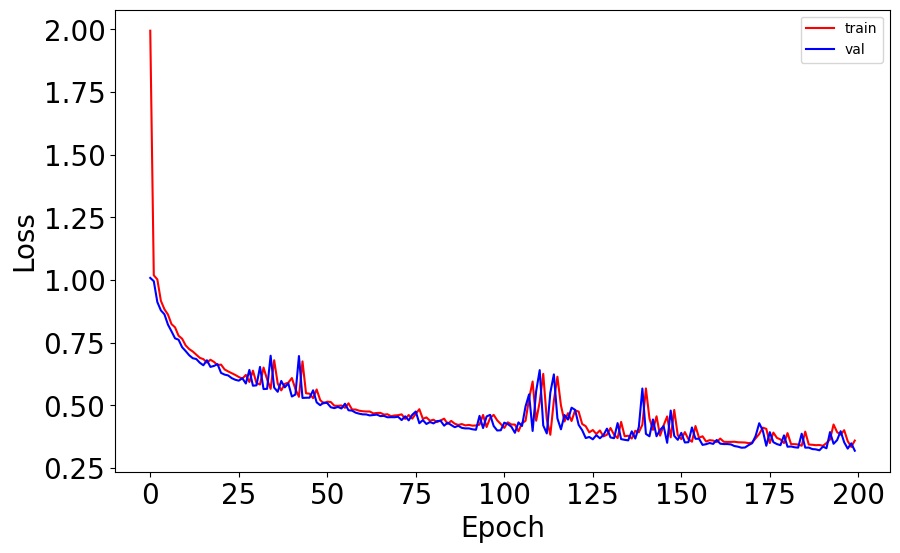

In [23]:
#Graficar el categorical crossentropy
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [24]:
#Predecir con el modelo
#Y_pred = model.predict_classes(X)
#Y_prob = model.predict_proba(X)


Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")

1/1 [==============================] - 0s 18ms/step


In [25]:
Y_pred

array([[2.11364750e-06, 8.32282782e-01, 1.67715132e-01],
       [9.60202217e-01, 3.97643521e-02, 3.34786782e-05],
       [6.24971076e-23, 1.97690126e-04, 9.99802291e-01],
       [6.31112130e-07, 7.71317124e-01, 2.28682280e-01],
       [1.75346395e-06, 8.23716044e-01, 1.76282167e-01],
       [9.60202217e-01, 3.97643521e-02, 3.34786782e-05],
       [1.61139145e-02, 9.74054158e-01, 9.83189046e-03],
       [3.40008035e-12, 9.81930196e-02, 9.01807010e-01],
       [1.04287121e-08, 4.92481351e-01, 5.07518709e-01],
       [1.46342278e-03, 9.76195514e-01, 2.23411079e-02],
       [6.44524017e-11, 1.91276252e-01, 8.08723688e-01],
       [9.60202217e-01, 3.97643521e-02, 3.34786782e-05],
       [9.60202217e-01, 3.97643521e-02, 3.34786782e-05],
       [9.60202217e-01, 3.97643521e-02, 3.34786782e-05],
       [9.60202217e-01, 3.97643521e-02, 3.34786782e-05],
       [1.36124186e-06, 8.11603189e-01, 1.88395455e-01],
       [3.44487936e-17, 5.67440176e-03, 9.94325578e-01],
       [5.02070412e-04, 9.67699

In [26]:
Y_prob

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]])

In [27]:
#Reverse
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = np_utils.to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [28]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [29]:
#Más métricas corregido
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)
Y_proba= model.predict(X_train)
Y_pred= np.argmax(Y_proba, axis=1)

accu_train = accuracy_score(y_train, Y_pred)
prec_train = precision_score(y_train, Y_pred,average='weighted')
reca_train = recall_score(y_train, Y_pred,average='weighted')

Y_proba= model.predict(X_test)
Y_pred= np.argmax(Y_proba, axis=1)

accu_test = accuracy_score(y_test, Y_pred)
prec_test = precision_score(y_test, Y_pred,average='weighted')
reca_test = recall_score(y_test, Y_pred,average='weighted')
print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

1/1 [==============================] - 0s 18ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.967 	 0.970 	 0.967
  Test 	 0.967 	 0.969 	 0.967


In [30]:
#Comparar contra Regresión logística
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train,y_train)
Yhat = model_log.predict(X_test)

accu_train = accuracy_score(y_train,model_log.predict(X_train))
prec_train = precision_score(y_train,model_log.predict(X_train),average='weighted')
reca_train = recall_score(y_train,model_log.predict(X_train),average='weighted')

accu_test = accuracy_score(y_test,model_log.predict(X_test))
prec_test = precision_score(y_test,model_log.predict(X_test),average='weighted')
reca_test = recall_score(y_test,model_log.predict(X_test),average='weighted')

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

 	 Accu 	 Prec 	 Reca
 Train 	 0.975 	 0.977 	 0.975
  Test 	 1.000 	 1.000 	 1.000


C:\Users\Ricardo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
